In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_8928/1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# read results
co_kriging_input = pd.read_csv(
    "../cokriging/exp_co_kriging_input.csv", index_col=0)
co_kriging_output = pd.read_csv(
    "../cokriging/exp_co_kriging_output.csv", index_col=0)
# return back to original directory
# merge input and output
co_kriging_results = pd.merge(
    co_kriging_input, co_kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
co_kriging_results["normalized_mae"] = co_kriging_results["normalized_mae"].abs()
co_kriging_results["normalized_rmse"] = co_kriging_results["normalized_rmse"].abs()

# read results for hk
hk_input = pd.read_csv("../hk/exp_hk_input.csv", index_col=0)
hk_output = pd.read_csv("../hk/exp_hk_output.csv", index_col=0)
# merge input and output
hk_results = pd.merge(hk_input, hk_output, left_index=True, right_index=True)
# make normalized_mae and normalized_rmse to be absolute value
hk_results["normalized_mae"] = hk_results["normalized_mae"].abs()
hk_results["normalized_rmse"] = hk_results["normalized_rmse"].abs()


# read results for mf scaled
mf_scaled_input = pd.read_csv(
    "../mf_scaled/exp_mf_scale_input.csv", index_col=0)
mf_scaled_output = pd.read_csv(
    "../mf_scaled/exp_mf_scale_output.csv", index_col=0)
# merge input and output
mf_scaled_results = pd.merge(
    mf_scaled_input, mf_scaled_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
mf_scaled_results["normalized_mae"] = mf_scaled_results["normalized_mae"].abs()
mf_scaled_results["normalized_rmse"] = mf_scaled_results["normalized_rmse"].abs()


# read results for mf-rbf-kriging
mf_rbf_kriging_input = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_input.csv", index_col=0
)
mf_rbf_kriging_output = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_output.csv", index_col=0
)
# merge input and output
mf_rbf_kriging_results = pd.merge(
    mf_rbf_kriging_input, mf_rbf_kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
mf_rbf_kriging_results["normalized_mae"] = mf_rbf_kriging_results[
    "normalized_mae"
].abs()
mf_rbf_kriging_results["normalized_rmse"] = mf_rbf_kriging_results[
    "normalized_rmse"
].abs()


# load kriging results
kriging_input = pd.read_csv("../kriging/exp_kriging_input.csv", index_col=0)
kriging_output = pd.read_csv("../kriging/exp_kriging_output.csv", index_col=0)
# merge input and output
kriging_results = pd.merge(
    kriging_input, kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
kriging_results["normalized_mae"] = kriging_results["normalized_mae"].abs()
kriging_results["normalized_rmse"] = kriging_results["normalized_rmse"].abs()
# remove results of "Forrestor_1a"
kriging_results = kriging_results[kriging_results["problem"] != "Forrester_1a"]

In [3]:
mf_rbf_kriging_results.problem.unique()

array(['mf_Bohachevsky', 'mf_Booth', 'mf_Borehole', 'mf_CurrinExp',
       'mf_Hartman3', 'mf_Hartman6', 'mf_Himmelblau', 'mf_Park91A',
       'mf_Park91B', 'mf_Sixhump'], dtype=object)

/tmp/ipykernel_8928/2804525970.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_mean = pivot_table["mean"].applymap("{:.2f}".format).astype(str).values
/tmp/ipykernel_8928/2804525970.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_std = "±" + pivot_table["std"].applymap("{:.2f}".format).astype(str).values


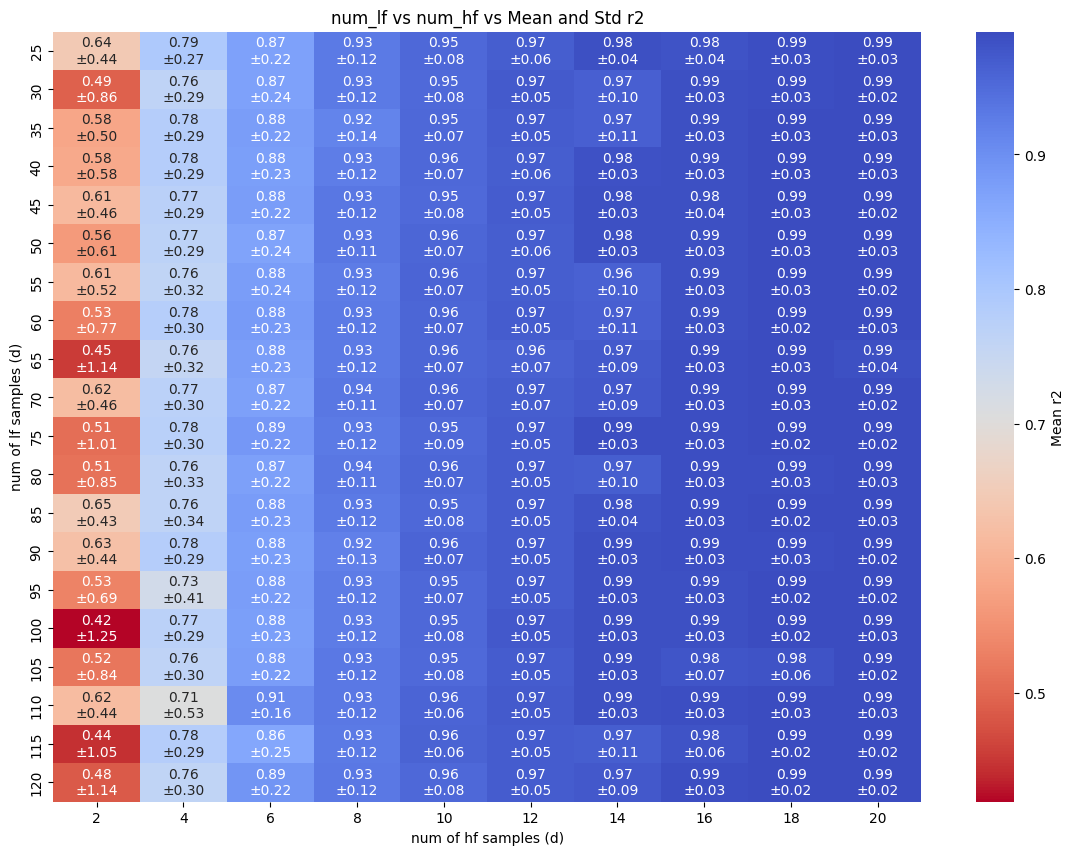

In [4]:
# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = co_kriging_results.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()

/tmp/ipykernel_8928/2393660461.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_mean = pivot_table["mean"].applymap("{:.2f}".format).astype(str).values
/tmp/ipykernel_8928/2393660461.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_std = "±" + pivot_table["std"].applymap("{:.2f}".format).astype(str).values


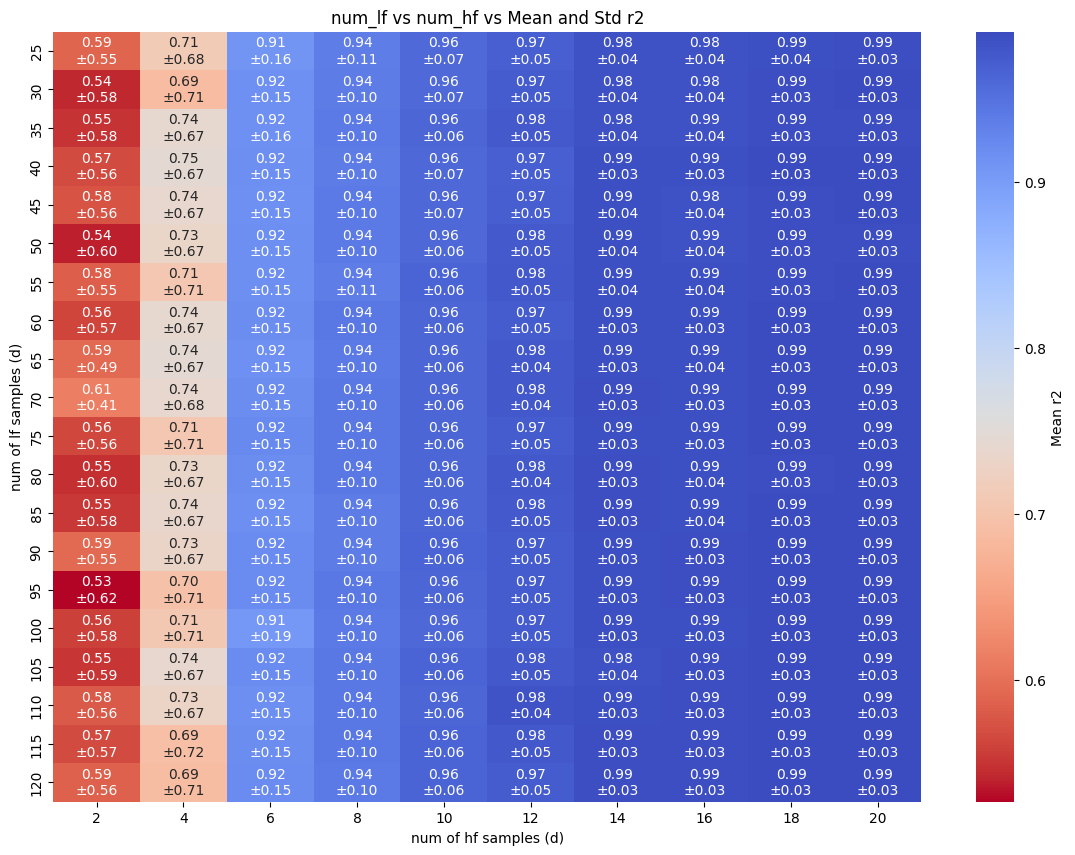

In [5]:
# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = hk_results.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()

/tmp/ipykernel_8928/3443520098.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_mean = pivot_table["mean"].applymap("{:.2f}".format).astype(str).values
/tmp/ipykernel_8928/3443520098.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_std = "±" + pivot_table["std"].applymap("{:.2f}".format).astype(str).values


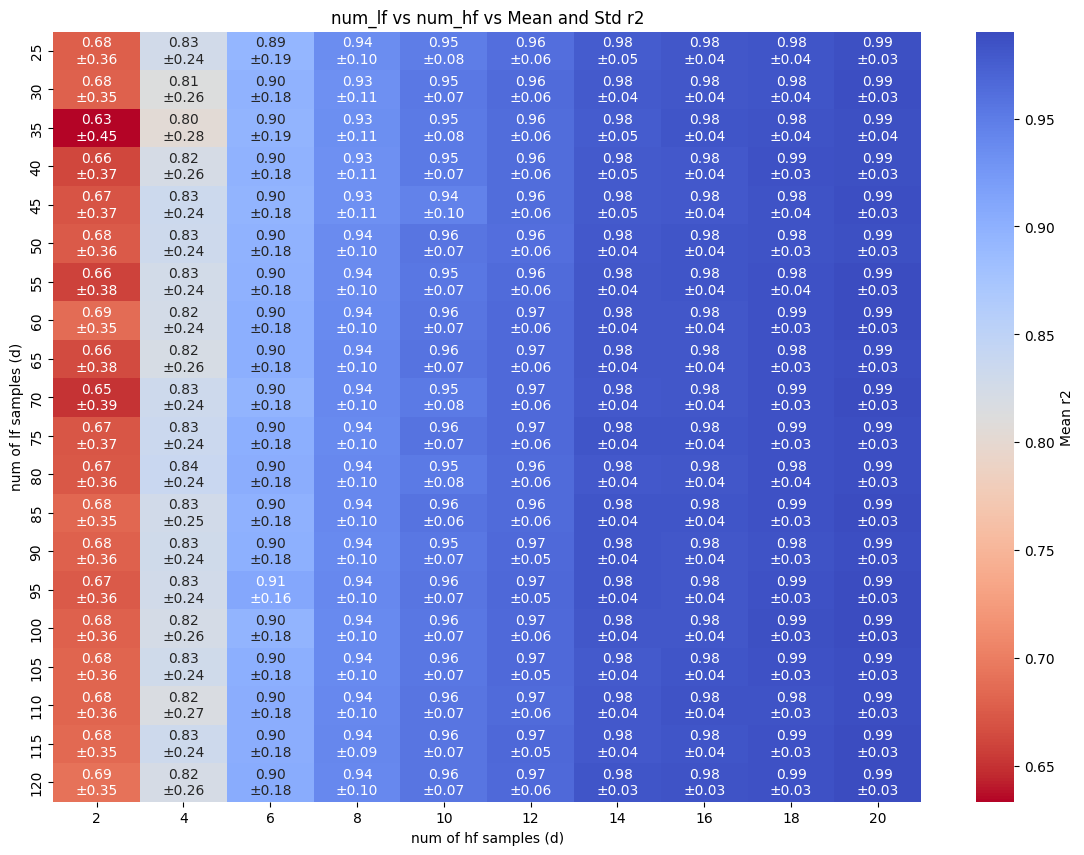

In [6]:
# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = mf_scaled_results.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()

/tmp/ipykernel_8928/1966663152.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_mean = pivot_table["mean"].applymap("{:.2f}".format).astype(str).values
/tmp/ipykernel_8928/1966663152.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_std = "±" + pivot_table["std"].applymap("{:.2f}".format).astype(str).values


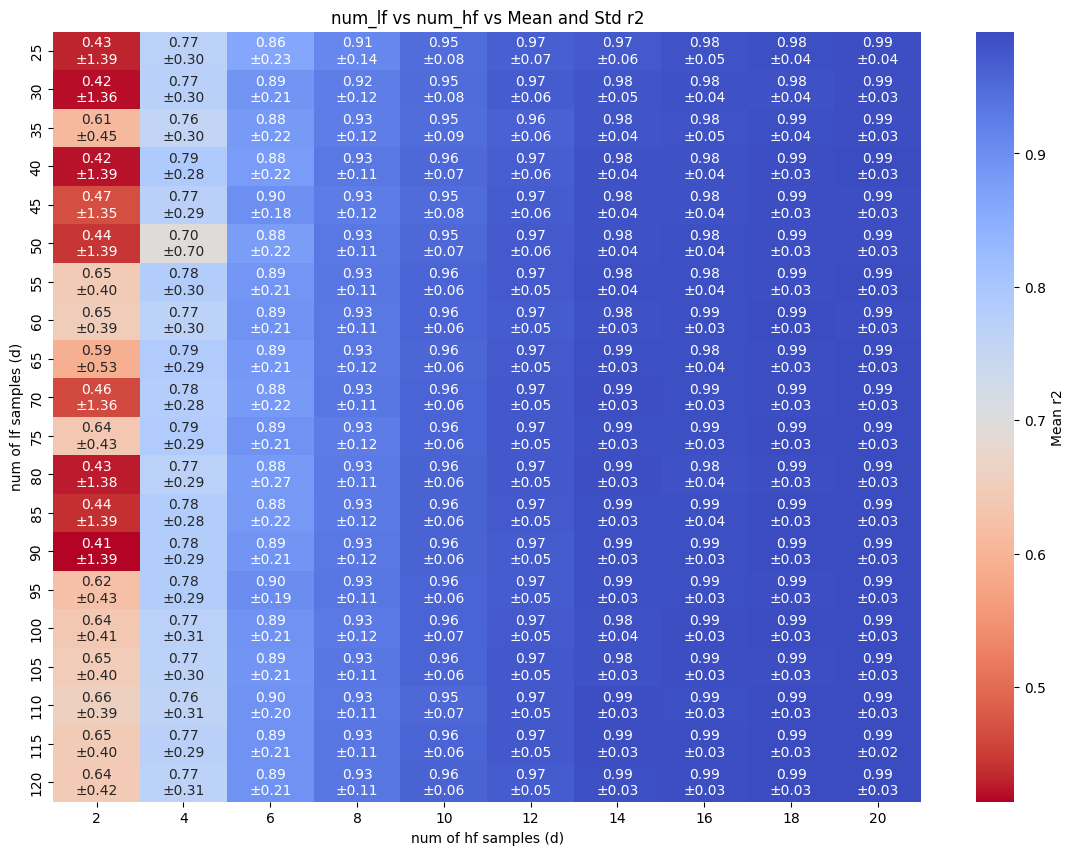

In [7]:
# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = mf_rbf_kriging_results.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()

In [8]:
# plot the heat plot between mf_rbf_kriging and hk
# create a new pandas dataframe with difference between mf_rbf_kriging and hk
mf_rbf_kriging_hk_diff = mf_rbf_kriging_results.copy()
mf_rbf_kriging_hk_diff["r2"] = mf_rbf_kriging_hk_diff["r2"] - \
    hk_results["r2"].values

mf_rbf_kriging_hk_diff

,method,num_hf,num_lf,problem,seed,progress,normalized_mae,normalized_rmse,r2,cpu_time
0,mf_rbf,2,25,mf_Bohachevsky,1,finished,1.274766,0.420211,-0.000472,0.319835
1,mf_rbf,4,25,mf_Bohachevsky,1,finished,1.037192,0.274981,-0.169572,0.806215
2,mf_rbf,6,25,mf_Bohachevsky,1,finished,0.490303,0.068994,-0.003774,1.112990
3,mf_rbf,8,25,mf_Bohachevsky,1,finished,0.191702,0.041623,-0.000287,0.769531
4,mf_rbf,10,25,mf_Bohachevsky,1,finished,0.818974,0.170050,-0.068164,1.016550
...,...,...,...,...,...,...,...,...,...,...
9995,mf_rbf,12,120,mf_Sixhump,5,finished,0.178483,0.027818,-0.000391,2.285934
9996,mf_rbf,14,120,mf_Sixhump,5,finished,0.177842,0.039122,-0.000810,2.062969
9997,mf_rbf,16,120,mf_Sixhump,5,finished,0.029837,0.004548,0.000001,3.315822
9998,mf_rbf,18,120,mf_Sixhump,5,finished,0.028758,0.003785,-0.000004,2.752050


/tmp/ipykernel_8928/2796990133.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_mean = pivot_table["mean"].applymap("{:.2f}".format).astype(str).values
/tmp/ipykernel_8928/2796990133.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_std = "±" + pivot_table["std"].applymap("{:.2f}".format).astype(str).values


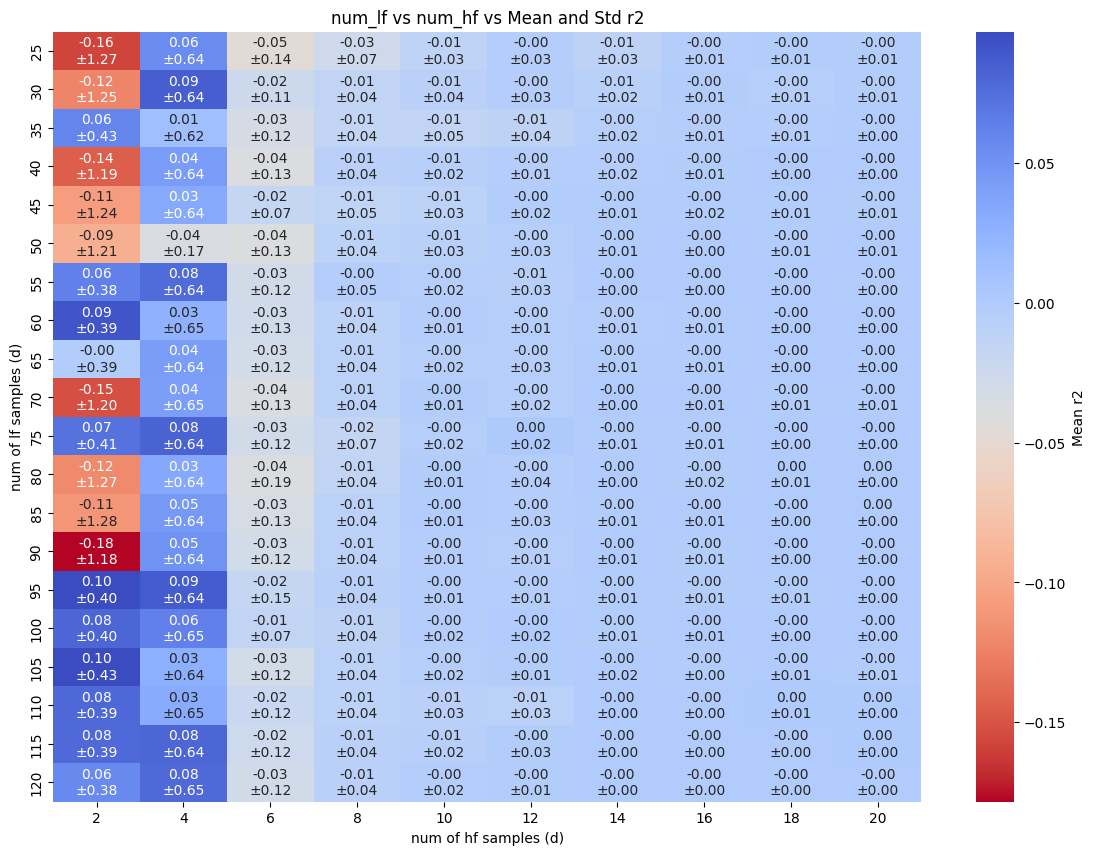

In [9]:
pivot_table = mf_rbf_kriging_hk_diff.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()

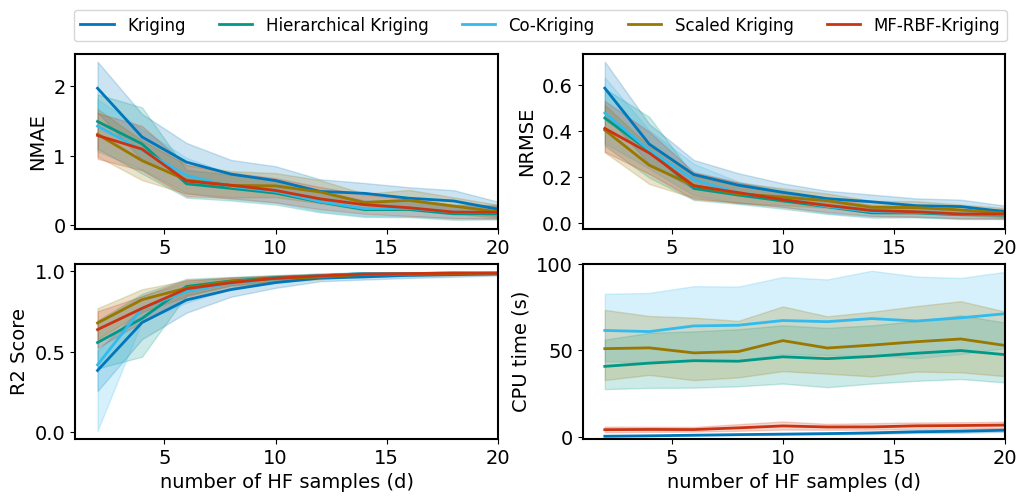

In [68]:
# get the results for 120 samples
hk_results_120 = hk_results[hk_results["num_lf"] == 100]
ck_results_120 = co_kriging_results[co_kriging_results["num_lf"] == 100]
scaled_results_120 = mf_scaled_results[mf_scaled_results["num_lf"] == 100]
mf_rbf_results_120 = mf_rbf_kriging_results[mf_rbf_kriging_results["num_lf"] == 100]


# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 5))
# Plotting mae
sns.lineplot(
    data=kriging_results,
    x="num_sample",
    y="normalized_mae",
    color="#0077BB",
    linewidth=2,
    ax=axes[0, 0],
)
sns.lineplot(
    data=hk_results_120,
    x="num_hf",
    y="normalized_mae",
    color="#009988",
    linewidth=2,
    ax=axes[0, 0],
)
sns.lineplot(
    data=ck_results_120,
    x="num_hf",
    y="normalized_mae",
    color="#33BBEE",
    linewidth=2,
    ax=axes[0, 0],
)
sns.lineplot(
    data=scaled_results_120,
    x="num_hf",
    y="normalized_mae",
    color="#997700",
    linewidth=2,
    ax=axes[0, 0],
)
sns.lineplot(
    data=mf_rbf_results_120,
    x="num_hf",
    y="normalized_mae",
    color="#CC3311",
    linewidth=2,
    ax=axes[0, 0],
)
axes[0, 0].set_xlim([1, 20])
axes[0, 0].set_xlabel(" ", fontsize=14)
axes[0, 0].set_ylabel("NMAE", fontsize=14)

# Plotting rmse
sns.lineplot(
    data=kriging_results,
    x="num_sample",
    y="normalized_rmse",
    color="#0077BB",
    linewidth=2,
    ax=axes[0, 1],
)
sns.lineplot(
    data=hk_results_120,
    x="num_hf",
    y="normalized_rmse",
    color="#009988",
    linewidth=2,
    ax=axes[0, 1],
)
sns.lineplot(
    data=ck_results_120,
    x="num_hf",
    y="normalized_rmse",
    color="#33BBEE",
    linewidth=2,
    ax=axes[0, 1],
)
sns.lineplot(
    data=scaled_results_120,
    x="num_hf",
    y="normalized_rmse",
    color="#997700",
    linewidth=2,
    ax=axes[0, 1],
)
sns.lineplot(
    data=mf_rbf_results_120,
    x="num_hf",
    y="normalized_rmse",
    color="#CC3311",
    linewidth=2,
    ax=axes[0, 1],
)
axes[0, 1].set_xlabel(" ", fontsize=14)
axes[0, 1].set_ylabel("NRMSE", fontsize=14)
axes[0, 1].set_xlim([1, 20])

# Plotting r2
sns.lineplot(
    data=kriging_results,
    x="num_sample",
    linewidth=2,
    y="r2",
    color="#0077BB",
    ax=axes[1, 0],
)
sns.lineplot(
    data=hk_results_120,
    x="num_hf",
    y="r2",
    linewidth=2,
    color="#009988",
    ax=axes[1, 0],
)
sns.lineplot(
    data=ck_results_120,
    x="num_hf",
    linewidth=2,
    y="r2",
    color="#33BBEE",
    ax=axes[1, 0],
)
sns.lineplot(
    data=scaled_results_120,
    x="num_hf",
    linewidth=2,
    y="r2",
    color="#997700",
    ax=axes[1, 0],
)
sns.lineplot(
    data=mf_rbf_results_120,
    x="num_hf",
    linewidth=2,
    y="r2",
    color="#CC3311",
    ax=axes[1, 0],
)

axes[1, 0].set_xlabel("number of HF samples (d)", fontsize=14)
axes[1, 0].set_ylabel("R2 Score", fontsize=14)
axes[1, 0].set_xlim([1, 20])
# Plotting cpu time
sns.lineplot(
    data=kriging_results,
    x="num_sample",
    linewidth=2,
    y="cpu_time",
    label="Kriging",
    color="#0077BB",
    ax=axes[1, 1],
)
sns.lineplot(
    data=hk_results_120,
    x="num_hf",
    linewidth=2,
    y="cpu_time",
    color="#009988",
    label="Hierarchical Kriging",
    ax=axes[1, 1],
)
sns.lineplot(
    data=ck_results_120,
    x="num_hf",
    linewidth=2,
    y="cpu_time",
    label="Co-Kriging",
    color="#33BBEE",
    ax=axes[1, 1],
)
sns.lineplot(
    data=scaled_results_120,
    x="num_hf",
    linewidth=2,
    y="cpu_time",
    label="Scaled Kriging",
    color="#997700",
    ax=axes[1, 1],
)
sns.lineplot(
    data=mf_rbf_results_120,
    x="num_hf",
    linewidth=2,
    y="cpu_time",
    label="MF-RBF-Kriging",
    color="#CC3311",
    ax=axes[1, 1],
)
axes[1, 1].set_xlabel("number of HF samples (d)", fontsize=14)
axes[1, 1].set_ylabel("CPU time (s)", fontsize=14)
axes[1, 1].set_xlim([1, 20])
axes[1, 1].set_ylim([-1, 100])

# set font size
font_size = 14
plt.legend(loc="upper center", bbox_to_anchor=(-0.1, 2.5), ncol=5, fontsize=12)
# plt.subplots_adjust(left=0.1, right=0.9, wspace=0.3)
axes[0, 0].tick_params(labelsize=font_size)
axes[0, 1].tick_params(labelsize=font_size)
axes[1, 0].tick_params(labelsize=font_size)
axes[1, 1].tick_params(labelsize=font_size)
for i in range(2):
    for j in range(2):
        axes[i, j].tick_params(axis="both", which="major", labelsize=font_size)
        # set the line width of the axis
        for axis in ["top", "bottom", "left", "right"]:
            axes[i, j].spines[axis].set_linewidth(1.5)

# Adjust layout
plt.savefig("comparison_at_100lf_samples.png", dpi=300, bbox_inches="tight")
plt.savefig("comparison_at_100lf_samples.pdf", dpi=300, bbox_inches="tight")
plt.savefig("comparison_at_100lf_samples.svg", dpi=300, bbox_inches="tight")
plt.show()

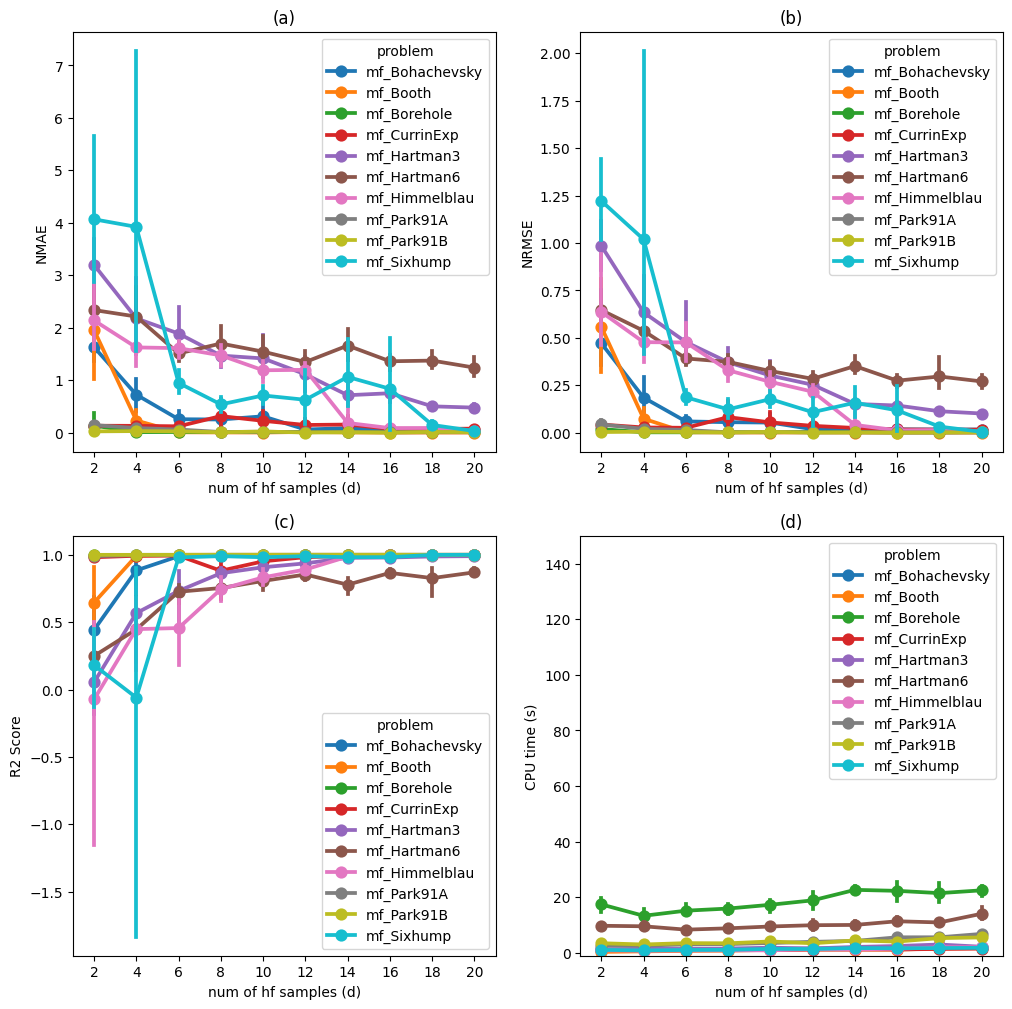

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.pointplot(
    x="num_hf",
    y="normalized_mae",
    hue="problem",
    data=mf_rbf_results_120,
    ax=axes[0, 0],
)
sns.pointplot(
    x="num_hf",
    y="normalized_rmse",
    hue="problem",
    data=mf_rbf_results_120,
    ax=axes[0, 1],
)
sns.pointplot(x="num_hf", y="r2", hue="problem",
              data=mf_rbf_results_120, ax=axes[1, 0])
sns.pointplot(
    x="num_hf", y="cpu_time", hue="problem", data=mf_rbf_results_120, ax=axes[1, 1]
)
axes[0, 0].set_title("(a)")
axes[0, 1].set_title("(b)")
axes[1, 0].set_title("(c)")
axes[1, 1].set_title("(d)")
axes[0, 0].set_xlabel("num of hf samples (d)")
axes[0, 0].set_ylabel("NMAE")
axes[0, 1].set_xlabel("num of hf samples (d)")
axes[0, 1].set_ylabel("NRMSE")
axes[1, 0].set_xlabel("num of hf samples (d)")
axes[1, 0].set_ylabel("R2 Score")
axes[1, 1].set_xlabel("num of hf samples (d)")
axes[1, 1].set_ylabel("CPU time (s)")
axes[1, 1].set_ylim([-1, 150])
plt.show()